In [26]:
import pandas as pd 
import numpy as np
from  datetime import datetime
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

ytUS_df = pd.read_csv("./data/US_videos_5p.csv", sep=';')
ytUS_df["region"] = "US"
# print(ytUS_df.shape)
# ytUS_df.head(10)


In [232]:
new_ytUS.describe().columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'pub_day_of_the_weak', 'pub_year', 'pub_month', 'pub_day', 'pub_hour',
       'tren_day_of_the_weak', 'tren_year', 'tren_month', 'tren_day',
       'time_to_trend', 'likes/dislikes', 'likes/views', 'dislikes/views',
       'comment_count/views', 'increase_views', 'increase_likes',
       'increase_dislikes', 'increase_comms', 'times_in_trend', 'avg_views',
       'avg_likes', 'avg_dislikes', 'avg_comms'],
      dtype='object')

Begining of the timeline  2017-11-14 00:00:00
End of the timeline  2018-06-14 00:00:00
Begining of the pub timeline  2006-07-23 08:24:11
End of the pub timeline  2018-06-14 01:31:53


Description of most common stats for a video:

              views         likes       dislikes  comment_count
count  6.284000e+03  6.284000e+03    6284.000000    6284.000000
mean   7.520064e+05  3.449267e+04    1428.116486    4514.513049
std    1.839096e+06  1.164957e+05   12125.379973   21560.956271
min    5.490000e+02  0.000000e+00       0.000000       0.000000
25%    8.341525e+04  1.910750e+03      72.000000     260.000000
50%    2.715305e+05  7.998500e+03     242.000000     918.000000
75%    7.532280e+05  2.519025e+04     766.250000    2850.500000
max    3.934993e+07  3.880071e+06  629120.000000  733373.000000


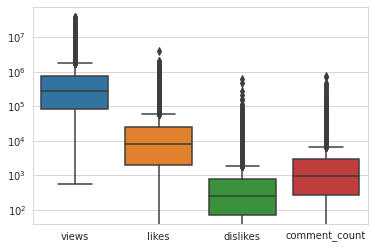



Description of most common stats proportions for a video:



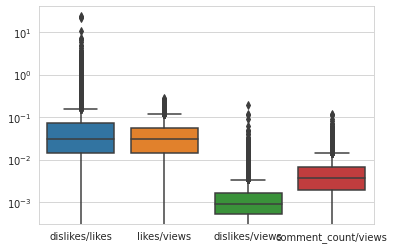


 Increase in stats after getting in to trending (only increase after first day)


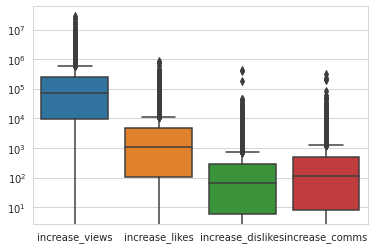



Time since publication until showing up on trending:

       time_to_trend
count    6284.000000
mean       22.159898
std       211.071638
min        -0.541713
25%         0.457546
50%         1.104161
75%         2.114922
max      4214.649873


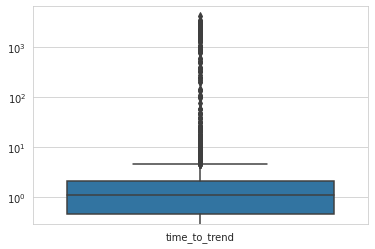

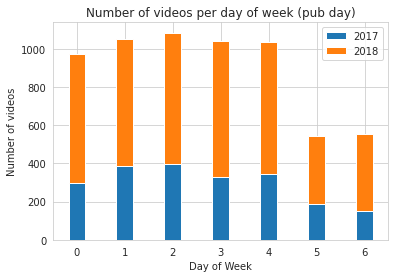



1.0    440
2.0    348
3.0    348
4.0    319
5.0    283
6.0    189
0.0    176
Name: tren_day_of_the_weak, dtype: int64
1.0    514
2.0    570
3.0    643
4.0    797
5.0    687
6.0    407
0.0    563
Name: tren_day_of_the_weak, dtype: int64
Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0], dtype='float64')


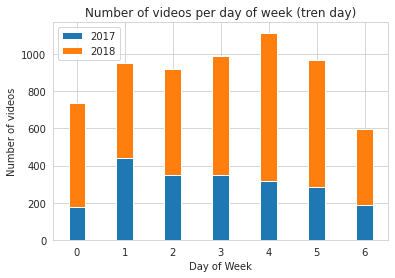

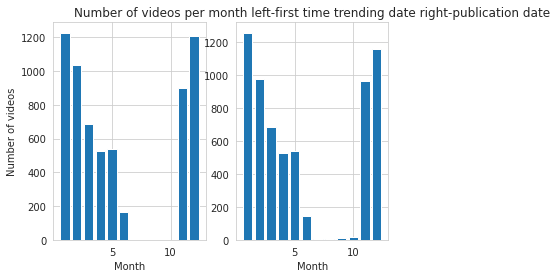

In [73]:
def describeAfter(df):

    min_ = df[['views','likes','dislikes','comment_count']]

    print("Begining of the timeline  {0}".format(df["tren_date"].min()))
    print("End of the timeline  {0}".format(df["tren_date"].max()))
    
    print("Begining of the pub timeline  {0}".format(df["pub_date"].min()))
    print("End of the pub timeline  {0}".format(df["pub_date"].max()))
    
    print("\n\nDescription of most common stats for a video:\n")
    print(df.describe()[['views','likes','dislikes','comment_count']])

    sns.set_style("whitegrid")
    data = df[['views','likes','dislikes','comment_count']]
    ax = sns.boxplot( data=data)
    ax.set(yscale="log")
    plt.show()

    
    print("\n\nDescription of most common stats proportions for a video:\n")
#     print(df.describe()[['dislikes/likes','likes/views','dislikes/views','comment_count/views']])

    sns.set_style("whitegrid")
    data = df[['dislikes/likes','likes/views','dislikes/views','comment_count/views']]
    ax = sns.boxplot( data=data)
    ax.set(yscale="log")
    plt.show()

    
    print("\n Increase in stats after getting in to trending (only increase after first day)")
        
    sns.set_style("whitegrid")
    data = df[['increase_views','increase_likes','increase_dislikes','increase_comms']]
    ax = sns.boxplot( data=data)
    ax.set(yscale="log")
    plt.show()

    
    
    
#     Time since publication to first apearence in trending
    print("\n\nTime since publication until showing up on trending:\n")
    print(df.describe()[['time_to_trend']])
    
    sns.set_style("whitegrid")
    data = df[['time_to_trend']]
    ax = sns.boxplot( data=data)
    ax.set(yscale="log")
    plt.show()


#     bar plot  of pub_day_of_the_weak


    print("\n")
    print("\n")

#     Colors for year 
# TODO weak - week
    print("\n")
    data17 = df[df["tren_year"]==2017]['pub_day_of_the_weak'].value_counts(sort=False)[df["pub_day_of_the_weak"].unique()]
    data18 = df[df["tren_year"]==2018]['pub_day_of_the_weak'].value_counts(sort=False)[df["pub_day_of_the_weak"].unique()]

    days = data17.keys()#[0,6,4,5,3,1,2]
    
    fig, ax = plt.subplots()
    ax.bar(days,data17,0.35,label="2017")
    ax.bar(days,data18,0.35,bottom=data17,label="2018")
    ax.set_xlabel ('Day of Week')
    ax.set_ylabel ('Number of videos')
    plt.title("Number of videos per day of week (pub day)")
    ax.legend()

    plt.show()

    print("\n")
    data17 = df[df["tren_year"]==2017]['tren_day_of_the_weak'].value_counts(sort=False)[df["tren_day_of_the_weak"].unique()]
    data18 = df[df["tren_year"]==2018]['tren_day_of_the_weak'].value_counts(sort=False)[df["tren_day_of_the_weak"].unique()]

    days = data17.keys()#[0,6,4,5,3,1,2]
    print(data17)
    print(data18)
    print(days)
    
    fig, ax = plt.subplots()
    ax.bar(days,data17,0.35,label="2017")
    ax.bar(days,data18,0.35,bottom=data17,label="2018")
    ax.set_xlabel ('Day of Week')
    ax.set_ylabel ('Number of videos')
    plt.title("Number of videos per day of week (tren day)")
    ax.legend()

    plt.show()

    
    print("\n")
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    data = df['tren_month'].value_counts(sort=False).sort_index()
#     print(data)
    months = data.keys()
    ax1.bar(months,data)
    ax1.set_xlabel ('Month')
    ax1.set_ylabel ('Number of videos')
#     plt.title("Number of videos per month (first time trending date)")
#     plt.show()
    
    print("\n")
    data = df['pub_month'].value_counts(sort=False).sort_index()
#     print(data)
    months = data.keys()
    ax2.bar(months,data)
    ax2.set_xlabel ('Month')
#     ax2.set_ylabel ('Number of videos')
    plt.title("Number of videos per month left-first time trending date right-publication date")
    plt.show()


    
describeAfter(new_ytUS)

In [11]:
# formatowanie czasu i rozbicie na atrybuty  
def generate_df(df):
    for index, row in df.iterrows():    
        pubdate = datetime.strptime(row['publish_time'],'%Y-%m-%dT%H:%M:%S.%fZ')
        df.loc[index,'pub_date'] = pubdate
        df.loc[index,'pub_day_of_the_weak'] = pubdate.weekday()
        df.loc[index,'pub_year'] = pubdate.year
        df.loc[index,'pub_month'] = pubdate.month
        df.loc[index,'pub_day'] = pubdate.day
        df.loc[index,'pub_hour'] = pubdate.hour
        trendate = datetime.strptime(row['trending_date'],'%y.%d.%m')
        df.loc[index,'tren_date'] = trendate
        df.loc[index,'tren_day_of_the_weak'] = trendate.weekday()
        df.loc[index,'tren_year'] = trendate.year
        df.loc[index,'tren_month'] = trendate.month
        df.loc[index,'tren_day'] = trendate.day
        df.loc[index,'time_to_trend'] = (trendate - pubdate).total_seconds()/(3600*24)


    # stosunek likes, dislikes, views
    df['dislikes/likes'] = df['dislikes']/df['likes']
    df['likes/views'] = df['likes']/df['views']
    df['dislikes/views'] = df['dislikes']/df['views']
    df['comment_count/views'] = df['comment_count']/df['views']
    unique = df['video_id'].unique()

    for uid in unique:
        temp = df[df['video_id']==uid]
        times_in_trend = len(temp)
        increase_views = 0
        increase_likes = 0
        increase_dislikes = 0
        increase_comms = 0
        indexes =  temp.index.values.tolist() 
        if times_in_trend > 1:
            increase_views = temp['views'][indexes[1]] - temp['views'][indexes[0]]
            increase_likes = temp['likes'][indexes[1]] - temp['likes'][indexes[0]]
            increase_dislikes = temp['dislikes'][indexes[1]] - temp['dislikes'][indexes[0]]
            increase_comms = temp['comment_count'][indexes[1]] - temp['comment_count'][indexes[0]]

        df.loc[indexes[0],'increase_views'] = increase_views
        df.loc[indexes[0],'increase_likes'] = increase_likes
        df.loc[indexes[0],'increase_dislikes'] = increase_dislikes
        df.loc[indexes[0],'increase_comms'] = increase_comms
        df.loc[indexes[0],'times_in_trend'] = times_in_trend
        df.loc[indexes[0],'avg_views'] = mean(temp['views'])
        df.loc[indexes[0],'avg_likes'] = mean(temp['likes'])
        df.loc[indexes[0],'avg_dislikes'] = mean(temp['dislikes'])
        df.loc[indexes[0],'avg_comms'] = mean(temp['comment_count'])
        df.loc[indexes[0],'avg_views_increase_per_hour'] = temp['views']/temp['time_to_trend']
    df = df[df['avg_comms'] >= 0] 
    return df


In [12]:
new_ytUS = generate_df(ytUS_df)

In [195]:
new_ytUS.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description ', 'region',
       'pub_day_of_the_weak', 'pub_year', 'pub_month', 'pub_day', 'pub_hour',
       'tren_day_of_the_weak', 'tren_year', 'tren_month', 'tren_day',
       'time_to_trend', 'likes/dislikes', 'likes/views', 'dislikes/views',
       'comment_count/views', 'increase_views', 'increase_likes',
       'increase_dislikes', 'increase_comms', 'times_in_trend', 'avg_views',
       'avg_likes', 'avg_dislikes', 'avg_comms'],
      dtype='object')

In [14]:
# Zmienić w VSCode kodowanie na UTF-16 LE
ytGB_df = pd.read_csv("./data/GB_videos_5p.csv", sep=';', encoding='utf_16')
ytGB_df["region"] = "GB"
print(ytGB_df.shape)
ytGB_df.head(5)

(38916, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


## TODO
<ul>
    <li>STATYSTYKI</li>
    <li>publish_time zamienić na 4 kolumny: godzina, dzień, miesiąc, rok + dodać dzień tygodnia</li>
    <li>trending_data zamienić na 3 kolumny: dzień, miesiąc, rok ????</li>
    <li>+ dodać może timestampy?</li>
    <li>tygodnie miesiąca???</li>
    <li>Dodać kolumnę z różnica czasu między trending_data a, publish_time</li>
    <li>liczba tagów</li>
    <li>stosunek likes/dislikes</li>
    <li>stosunek likes/views</li>
    <li>stosunek dislikes/views</li>
    <li>Statystyki każdej kolumny: unikalne, max, min, średnia, odchylenie, mediana, ile NaN</li>
    <li>dodac kolumny ze statystykami w konkretnych trening_date</li>
    <li>ATRYBUTY TEKSTOWE</li>
    <li>Wydobyć tagi do list</li>
    <li>dlugosc title i description</li>
    <li>ile % wielkich liter w title/description</li>
    <li>ile % interpunkcji, czy w ogóle jest?</li>
    <li>czy jest link w description</li>
    <li>title - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>
    <li>tags - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>
    <li>description - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>

</ul>

In [123]:
import re

txt = "The rai445n in Spd345345fdain"
x = re.findall("[0-9]+", txt)
print("x: ", x)

test = "Click here to continue the story and make your own monster:\\nhttp://bit.ly/2mboXgj\\n\\nJoe befriends a noisy Monster under his bed but the two have so much fun together that he can't get to sleep, leaving him tired by day. For Christmas Joe receives a gift to help him finally get a good night’s sleep.\\n\\nShop the ad\\nhttp://bit.ly/2hg04Lc\\n\\nThe music is Golden Slumbers performed by elbow, the original song was by The Beatles. \\nFind the track:\\nhttps://Elbow.lnk.to/GoldenSlumbersXS\\n\\nSubscribe to this channel for regular video updates\\nhttp://bit.ly/2eU8MvW\\n\\nIf you want to hear more from John Lewis:\\n\\nLike John Lewis on Facebook\\nhttp://www.facebook.com/johnlewisretail\\n\\nFollow John Lewis on Twitter\\nhttp://twitter.com/johnlewisretail\\n\\nFollow John Lewis on Instagram\\nhttp://instagram.com/johnlewisretail"
tokens = test.split(" ")
t = tokens[10].replace('\\n', '')
print("t: ",t)
match_link = re.search("http(s)?://[/\.a-zA-z0-9]+", t)
print("match_link: ", match_link)
# t = test.replace('\\n', '')
print("t: ",t)

match_link = re.findall(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", t)
print("match_link: ", match_link)
# for match in match_link:
#     print(match)

x:  ['445', '345345']
t:  monster:http://bit.ly/2mboXgjJoe
match_link:  <re.Match object; span=(8, 32), match='http://bit.ly/2mboXgjJoe'>
t:  monster:http://bit.ly/2mboXgjJoe
match_link:  [('http://bit.ly/2mboXgjJoe', '', '', '', '')]
